# Analysing Air Quaility Data with Python and Pandas
## Fetch the data

First we need to fetch the air quality data from the Opendata site provided by Bristol City Council. We are fetching the last 1000 data points for a single `site_id` (501) which is a sensor in the centre of the city.

In [3]:
import requests
import pandas as pd

r = requests.get("https://opendata.bristol.gov.uk/api/records/1.0/search/?dataset=air-quality-data-continuous&rows=1000&q=siteid%3D501&sort=date_time&facet=date_time&facet=location&facet=current")
data = r.json()

We want the 'fields' dictionary within the records, so we can extract that with a python list comprehension. We convert the `date_time` column to be an actual datetime object and sort on it.

Then lets look at what the data looks like:

In [13]:
df = pd.DataFrame([ record['fields'] for record in data['records'] ])
df.set_index('date_time', inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head()

,current,datestart,geo_point_2d,location,no,no2,nox,pm10,siteid
date_time,,,,,,,,,
2020-02-25 14:00:00+00:00,True,2018-11-30T00:00:00+00:00,"[51.4552693825, -2.59664882861]",Colston Avenue,100.25,86.50,240.25,14.050,501
2020-02-25 15:00:00+00:00,True,2018-11-30T00:00:00+00:00,"[51.4552693825, -2.59664882861]",Colston Avenue,167.25,108.50,365.25,17.975,501
2020-02-25 16:00:00+00:00,True,2018-11-30T00:00:00+00:00,"[51.4552693825, -2.59664882861]",Colston Avenue,160.50,108.25,354.75,13.450,501
2020-02-25 17:00:00+00:00,True,2018-11-30T00:00:00+00:00,"[51.4552693825, -2.59664882861]",Colston Avenue,157.25,92.50,333.75,9.300,501
2020-02-25 18:00:00+00:00,True,2018-11-30T00:00:00+00:00,"[51.4552693825, -2.59664882861]",Colston Avenue,144.75,107.50,329.50,9.275,501


Let's plot one of the columns, `nox` to see what it looks like and see if we can see a drop in Nitrogen Oxides in the atmosphere:

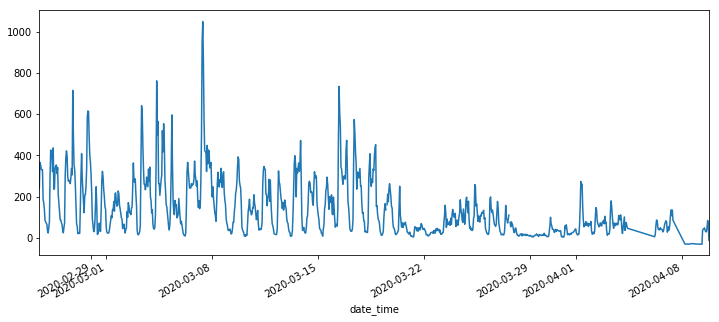

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

df['nox'].plot(figsize=[12, 5])

There certainly seems to be a drop off of NOX levels around the 22nd March. How about if we could smooth the data a bit? With Pandas we can chain together a number of methods, so below will create a new column in our dataframe called `nox_smoothed` and will fill it with a rolling 100-period mean. The method `fillna` allows us to forward fill any missing values with the previous value. We can then plot both columns on a single chart:

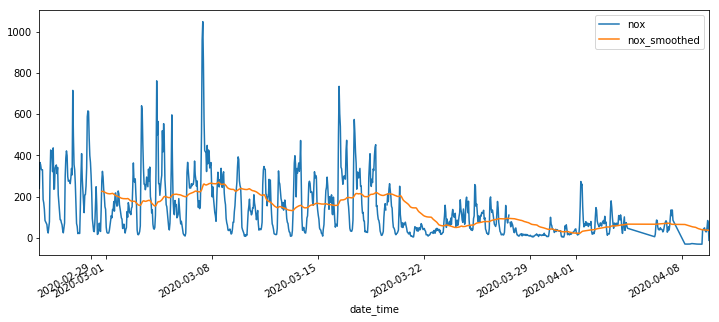

In [58]:
df['nox_smoothed'] = df['nox'].fillna(method='ffill').rolling(100).mean()

df[['nox', 'nox_smoothed']].plot(figsize=[12,5])

So far we have been plotting the data for a single `site_id` (501). But let's now get the data for all sensors. So we have removed the `site_id` parameter from the URL and are now fetching the last 10,000 entries.

In [15]:
r = requests.get("https://opendata.bristol.gov.uk/api/records/1.0/search/?dataset=air-quality-data-continuous&rows=10000&sort=date_time&facet=date_time&facet=location&facet=current")
data2 = r.json()

df2 = pd.DataFrame([ record['fields'] for record in data2['records'] ])
df2.set_index('date_time', inplace=True)
df2.index = pd.to_datetime(df2.index)
df2.sort_index(inplace=True)
df2.head()

,current,datestart,geo_point_2d,location,no,no2,nox,o3,pm10,pm25,rh,siteid,temp
date_time,,,,,,,,,,,,,
2020-02-07 07:00:00+00:00,True,2002-02-01T00:00:00+00:00,"[51.432675707, -2.60495665673]",Parson Street School,36.7865,43.3659,99.8803,NaN,NaN,NaN,20.6911,215,3.1966
2020-02-07 07:00:00+00:00,True,2006-06-15T00:00:00+00:00,"[51.4628294172, -2.58454081635]",AURN St Pauls,3.4784,22.8032,28.1367,30.7338,22.223,17.0,NaN,452,NaN
2020-02-07 07:00:00+00:00,True,2001-01-01T00:00:00+00:00,"[51.4417471802, -2.55995583224]",Brislington Depot,8.2926,26.4403,39.1584,NaN,NaN,NaN,NaN,203,NaN
2020-02-07 07:00:00+00:00,True,2017-08-01T00:00:00+00:00,"[51.4579497129, -2.58398909033]",Temple Way,NaN,NaN,NaN,NaN,24.155,NaN,NaN,500,NaN
2020-02-07 07:00:00+00:00,True,2009-03-13T00:00:00+00:00,"[51.4780449714, -2.53523027459]",Fishponds Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN


It would be far more useful to be able to re-arrange the data such that we can get each different site id as a separate column. We can do this with a "pivot table" as shown below. In this case we pull out just the `nox` value.

In [16]:
pivot = df2.pivot_table(values='nox', columns='siteid', index='date_time')
pivot.head()

siteid,203,215,270,452,463,500,501
date_time,,,,,,,
2020-02-07 07:00:00+00:00,39.1584,99.8803,NaN,28.1367,NaN,NaN,NaN
2020-02-07 08:00:00+00:00,85.4409,182.5959,91.00,50.1228,NaN,NaN,168.00
2020-02-07 09:00:00+00:00,94.5731,220.0809,105.75,50.2146,NaN,NaN,153.25
2020-02-07 10:00:00+00:00,90.7481,199.1869,84.25,48.6081,NaN,NaN,108.50
2020-02-07 11:00:00+00:00,75.9741,163.9491,84.75,46.0377,NaN,NaN,136.00


We can plot a 'stacked' area chart to see both the individual and the total of all sensors:

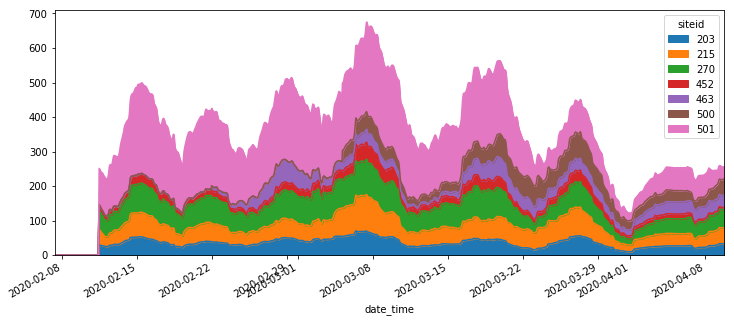

In [59]:
pivot.fillna(method='ffill').rolling(100).mean().plot(kind='area', figsize=[12,5])

I wonder how the polution varies throughout the day, and if there has been a change in the pattern of the polution since before and after the lockdown? 

Let's create a new column in which we just have the hour of the day:

In [21]:
df2['hour'] = df2.index.hour
df2.head()

,current,datestart,geo_point_2d,location,no,no2,nox,o3,pm10,pm25,rh,siteid,temp,hour
date_time,,,,,,,,,,,,,,
2020-02-07 07:00:00+00:00,True,2002-02-01T00:00:00+00:00,"[51.432675707, -2.60495665673]",Parson Street School,36.7865,43.3659,99.8803,NaN,NaN,NaN,20.6911,215,3.1966,7
2020-02-07 07:00:00+00:00,True,2006-06-15T00:00:00+00:00,"[51.4628294172, -2.58454081635]",AURN St Pauls,3.4784,22.8032,28.1367,30.7338,22.223,17.0,NaN,452,NaN,7
2020-02-07 07:00:00+00:00,True,2001-01-01T00:00:00+00:00,"[51.4417471802, -2.55995583224]",Brislington Depot,8.2926,26.4403,39.1584,NaN,NaN,NaN,NaN,203,NaN,7
2020-02-07 07:00:00+00:00,True,2017-08-01T00:00:00+00:00,"[51.4579497129, -2.58398909033]",Temple Way,NaN,NaN,NaN,NaN,24.155,NaN,NaN,500,NaN,7
2020-02-07 07:00:00+00:00,True,2009-03-13T00:00:00+00:00,"[51.4780449714, -2.53523027459]",Fishponds Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,7


As well as calling the plot methods on the dataframe itself, we can call them from the `plt` module. This allows us to plot multiple series on the same figure. We can also set some nice things such as a legend for the data series, title and axes labels

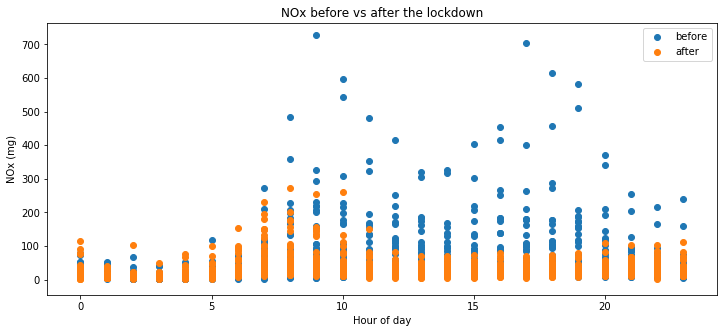

In [60]:
before = df2['2020-02-06':'2020-02-13']
after = df2['2020-03-30':'2020-04-06']

plt.figure(figsize=[12,5])
plt.title('NOx before vs after the lockdown')
plt.xlabel('Hour of day') 
plt.ylabel('NOx (mg)')
plt.scatter(before['hour'], before['nox'], label="before")
plt.scatter(after['hour'], after['nox'], label="after")
plt.legend()
plt.show()

In the scatter chart we can definately see a tendancy for there to be higher NOx levels on the days before the lockdown (blue) compared to the days after (orange).

But just to make it clear, let's use the `groupby()` method to group the entries by hour and take the mean of each hour and then plot that on a line chart:

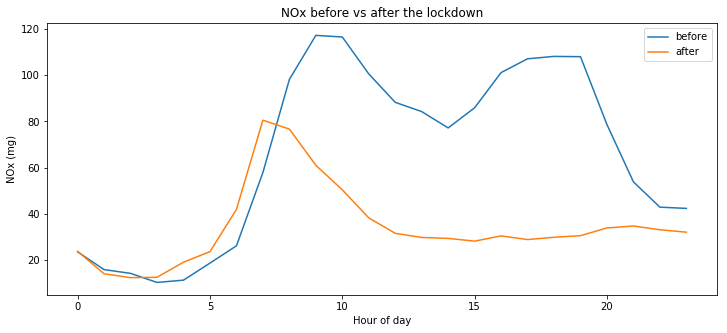

In [61]:
before = df2['2020-02-06':'2020-02-13'].groupby('hour').mean()
after = df2['2020-03-30':'2020-04-06'].groupby('hour').mean()

plt.figure(figsize=[12,5])
plt.title('NOx before vs after the lockdown')
plt.xlabel('Hour of day') 
plt.ylabel('NOx (mg)')
plt.plot(before.index, before['nox'], label="before")
plt.plot(after.index, after['nox'], label="after")
plt.legend()
plt.show()

So there we have it! Pretty clear to see. there is a significantly lower peak of polution at 9am where polution is about 33% lower on average. But most significantly is that the end-of-work-day peak at 5-6pm is completely absent. Maybe this also has to do with schools being closed as well? The overall polution level throughout the day is around half what it was before the lockdown.